# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import re
import seaborn as sns
import collections
import glob
import json
import time
import logging
import random
import re
from itertools import chain
from string import punctuation

# DataSet Read

In [2]:
# Create a list of column names for a DataFrame
# The list will contain column names as 'Col0', 'Col1', ..., 'Col14' beacue our dataset does not have any column names
columns_for_dataframe = ['Col' + str(index) for index in range(15)]

# Insert 'Review' at the beginning of the column list
columns_for_dataframe.insert(0, 'Review')


In [3]:
# Read the dataset from the CSV file and assign column names from 'columns_for_dataframe'
dataframe_evaluation = pd.read_csv('Evaluation-dataset.csv', names=columns_for_dataframe)

# Display the first few rows of the DataFrame to verify the content
dataframe_evaluation.head()


,Review,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14
0,Tires where delivered to the garage of my choi...,garage service positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Easy Tyre Selection Process, Competitive Prici...",garage service positive,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Very easy to use and good value for money.,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Really easy and convenient to arrange,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,It was so easy to select tyre sizes and arrang...,location positive,value for money positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Preparation and Feature Engineering

In [4]:
# Create a new column 'Concatenated_Reviews' which contains all sentences from other columns concatenated with a comma

# Using the apply method to concatenate all column values in each row, excluding the first column 'Review'
# dropna() is used to ignore NaN values, and astype(str) is used to ensure all values are strings before joining
dataframe_evaluation['Concatenated_Reviews'] = dataframe_evaluation[dataframe_evaluation.columns[1:]].apply(lambda row: ', '.join(row.dropna().astype(str)), axis=1)

# Display the first few rows of the updated DataFrame to verify the new 'Concatenated_Reviews' column
dataframe_evaluation.head()


,Review,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14,Concatenated_Reviews
0,Tires where delivered to the garage of my choi...,garage service positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"garage service positive, ease of booking positive"
1,"Easy Tyre Selection Process, Competitive Prici...",garage service positive,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"garage service positive, value for money positive"
2,Very easy to use and good value for money.,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,value for money positive
3,Really easy and convenient to arrange,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ease of booking positive
4,It was so easy to select tyre sizes and arrang...,location positive,value for money positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"location positive, value for money positive, e..."


In [5]:
# Check for any missing values in the newly created 'Concatenated_Reviews' column
missing_values_in_concatenated_reviews = dataframe_evaluation['Concatenated_Reviews'].isnull().sum()

# Print the number of missing values in 'Concatenated_Reviews' column
print("Number of missing values in 'Concatenated_Reviews' column:", missing_values_in_concatenated_reviews)


Number of missing values in 'Concatenated_Reviews' column: 0


In [12]:
# Replace '[REDACTED]' with 'the company' in the 'Review' column and create a new column 'Processed_Review'
dataframe_evaluation['Processed_Review'] = dataframe_evaluation.apply(lambda row: row['Review'].replace('[REDACTED]', 'the company'), axis=1)

# Create a feature 'Contains_Redacted' to check the presence of '[REDACTED]' in the 'Review' column
dataframe_evaluation['Contains_Redacted'] = dataframe_evaluation.apply(lambda row: '[REDACTED]' in row['Review'], axis=1)

# Display a head of the dataframe
dataframe_evaluation.head()



,Review,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14,Concatenated_Reviews,Processed_Review,Contains_Redacted
0,Tires where delivered to the garage of my choi...,garage service positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"garage service positive, ease of booking positive",Tires where delivered to the garage of my choi...,False
1,"Easy Tyre Selection Process, Competitive Prici...",garage service positive,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"garage service positive, value for money positive","Easy Tyre Selection Process, Competitive Prici...",False
2,Very easy to use and good value for money.,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,value for money positive,Very easy to use and good value for money.,False
3,Really easy and convenient to arrange,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ease of booking positive,Really easy and convenient to arrange,False
4,It was so easy to select tyre sizes and arrang...,location positive,value for money positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"location positive, value for money positive, e...",It was so easy to select tyre sizes and arrang...,False


In [13]:
# Count the occurrences of True and False values in the 'Contains_Redacted' column
redacted_value_counts = dataframe_evaluation['Contains_Redacted'].value_counts()

# Print the count of occurrences of True and False values in 'Contains_Redacted'
print("Count of occurrences in 'Contains_Redacted':\n", redacted_value_counts)


Count of occurrences in 'Contains_Redacted':
 False    8502
True     1630
Name: Contains_Redacted, dtype: int64


Here we can see the values of TRUE and FALSE 

In [14]:
# Review DataFrame is created for exploring the types and distribution of sentiments across the data
# Count the total types of reviews present in the original dataset

# Create a DataFrame to hold the counts of unique values in the 'Review' column
review_distribution = pd.DataFrame(dataframe_evaluation['Col0'].value_counts())

# Loop through columns 2 to 15 and concatenate the counts of unique values to the review_distribution DataFrame
for column in dataframe_evaluation.columns[2:16]:
    review_distribution = pd.concat([review_distribution, pd.DataFrame(dataframe_evaluation[column].value_counts())])

# Display the first few rows of the review_distribution DataFrame to verify the content
review_distribution.head()


,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14
value for money positive,3334.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
garage service positive,1106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ease of booking positive,644.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location positive,480.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
length of fitting positive,285.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Add a new column 'Sum' to the DataFrame to contain the count of each sentiment with their polarity tags in all columns
review_distribution['Sum'] = review_distribution.fillna(0).apply(lambda x: sum(x), axis=1)

# Reset the index of the DataFrame
review_distribution.reset_index(inplace=True)

# Rename the column 'index' to 'Reviews'
review_distribution.rename(columns={'index': 'Reviews'}, inplace=True)
review_distribution.head()

,Reviews,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14,Sum
0,value for money positive,3334.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3334.0
1,garage service positive,1106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1106.0
2,ease of booking positive,644.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,644.0
3,location positive,480.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,480.0
4,length of fitting positive,285.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285.0


In [18]:
# Filter out rows containing positive sentiments
positive = review_distribution[review_distribution['Reviews'].str.contains("positive")]

# Filter out rows containing negative sentiments
negative = review_distribution[review_distribution['Reviews'].str.contains("negative")]

# Calculate the total number of sentiments with positive polarity tag
total_positive_sentiments = positive['Sum'].sum()

# Calculate the total number of sentiments with negative polarity tag
total_negative_sentiments = negative['Sum'].sum()

# Print the total number of sentiments with positive polarity tag
print('Total number of sentiments with positive polarity tag: {}'.format(total_positive_sentiments))

# Print the total number of sentiments with negative polarity tag
print('Total number of sentiments with negative polarity tag: {}'.format(total_negative_sentiments))

# Print the total size of the data
print('Total size of data: {}'.format(dataframe_evaluation.shape[0]))

# Here we can see the class imbalance, as both negative and positive sentiments are present.


Total number of sentiments with positive polarity tag: 11889.0
Total number of sentiments with negative polarity tag: 2611.0
Total size of data: 10132


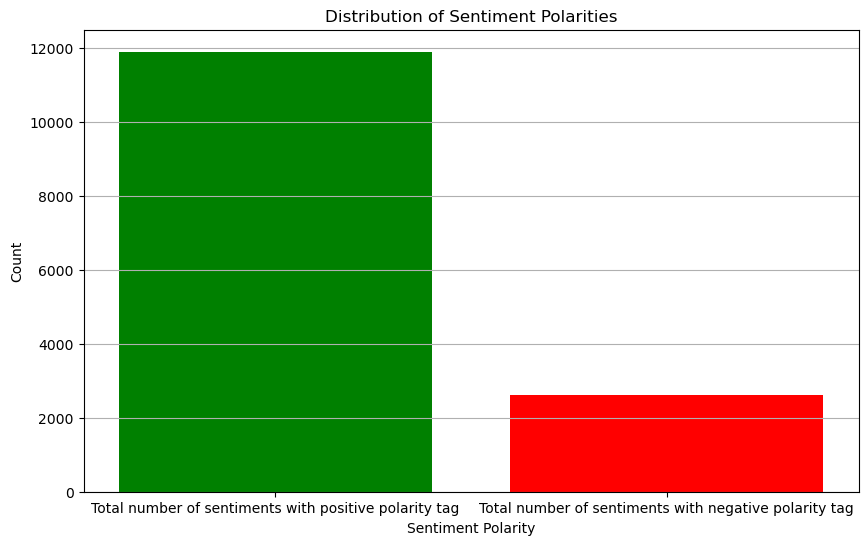

In [28]:
# Calculate the total number of sentiments with positive polarity tag
total_positive_sentiments = positive['Sum'].sum()

# Calculate the total number of sentiments with negative polarity tag
total_negative_sentiments = negative['Sum'].sum()

# Create lists for the x-values (counts) and y-values (labels)
x = ['Total number of sentiments with positive polarity tag', 'Total number of sentiments with negative polarity tag']
y = [total_positive_sentiments, total_negative_sentiments]

# Define colors for each bar
colors = ['green', 'red']

# Create a vertical bar plot
plt.figure(figsize=(10, 6))
plt.bar(x, y, color=colors)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Polarities')
plt.grid(axis='y')  # Add gridlines along the y-axis
plt.show()


In [29]:
# Count the number of rows containing at least one positive sentiment
positive_rows_count = dataframe_evaluation[dataframe_evaluation['Concatenated_Reviews'].str.contains('positive')].shape[0]

# Count the number of rows containing at least one negative sentiment
negative_rows_count = dataframe_evaluation[dataframe_evaluation['Concatenated_Reviews'].str.contains('negative')].shape[0]

# Count the number of rows containing neither positive nor negative sentiment
other_rows_count = dataframe_evaluation[~dataframe_evaluation['Concatenated_Reviews'].str.contains('positive')].shape[0]

# Print the counts
print('Total rows containing at least one positive sentiment:', positive_rows_count)
print('Total rows containing at least one negative sentiment:', negative_rows_count)
print('Total rows containing neither positive nor negative sentiment:', other_rows_count)


Total rows containing at least one positive sentiment: 7184
Total rows containing at least one negative sentiment: 1469
Total rows containing neither positive nor negative sentiment: 2948


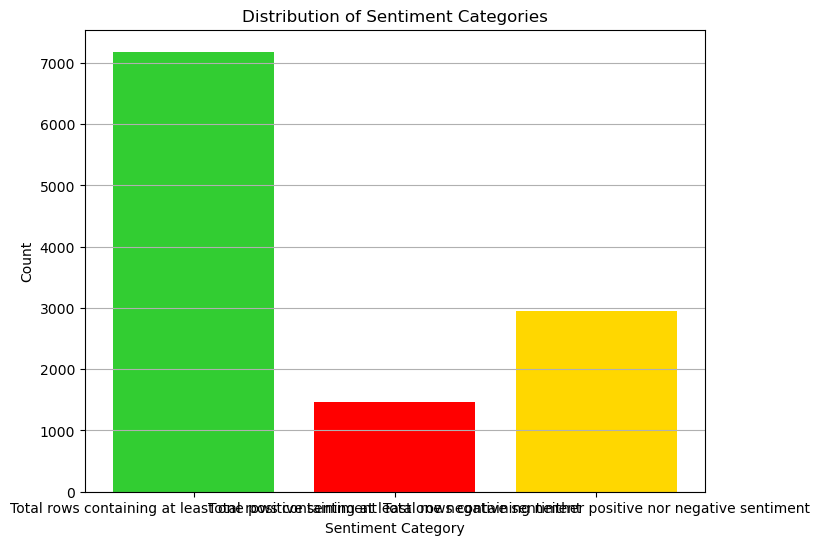

In [30]:
# List to store the counts
counts = [positive_rows_count, negative_rows_count, other_rows_count]

# List of labels for the counts
labels = ['Total rows containing at least one positive sentiment', 
          'Total rows containing at least one negative sentiment',
          'Total rows containing neither positive nor negative sentiment']

# Define colors for each category
colors = ['limegreen', 'red', 'gold']

# Create a vertical bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=colors)
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Categories')
plt.grid(axis='y')  # Add gridlines along the y-axis
plt.show()


In [31]:
# Drop rows from the DataFrame where the 'Concatenated_Reviews' column does not contain either 'negative' or 'positive'
dataframe_evaluation.drop(dataframe_evaluation[~dataframe_evaluation['Concatenated_Reviews'].str.contains('negative|positive')].index, inplace=True)
dataframe_evaluation.shape

(8125, 19)

In [32]:
# Reset the index of the DataFrame so as to have max index as 8125
dataframe_evaluation.reset_index(inplace=True)

# Drop the 'index' column
dataframe_evaluation.drop(['index'], axis=1, inplace=True)
dataframe_evaluation.tail(3) #here we set

,Review,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14,Concatenated_Reviews,Processed_Review,Contains_Redacted
8122,"I ordered the wrong tyres, however [REDACTED] ...",refund positive,delivery punctuality positive,refund timescale positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"refund positive, delivery punctuality positive...","I ordered the wrong tyres, however the company...",True
8123,"Good experience, first time I have used [REDAC...",length of fitting positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,length of fitting positive,"Good experience, first time I have used the co...",True
8124,"I ordered the tyre I needed on line, booked a ...",location positive,delivery punctuality positive,length of fitting positive,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"location positive, delivery punctuality positi...","I ordered the tyre I needed on line, booked a ...",True


In [33]:
dataframe_evaluation.head()

,Review,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14,Concatenated_Reviews,Processed_Review,Contains_Redacted
0,Tires where delivered to the garage of my choi...,garage service positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"garage service positive, ease of booking positive",Tires where delivered to the garage of my choi...,False
1,"Easy Tyre Selection Process, Competitive Prici...",garage service positive,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"garage service positive, value for money positive","Easy Tyre Selection Process, Competitive Prici...",False
2,Very easy to use and good value for money.,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,value for money positive,Very easy to use and good value for money.,False
3,Really easy and convenient to arrange,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ease of booking positive,Really easy and convenient to arrange,False
4,It was so easy to select tyre sizes and arrang...,location positive,value for money positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"location positive, value for money positive, e...",It was so easy to select tyre sizes and arrang...,False


In [34]:
#This block of code defines a function sterilization to clean text data, 
#removing HTTP links, HTML tags, emojis, alphanumeric shortcuts, and extra white spaces from a DataFrame column.
#It then applies this function to the specified column and stores the cleaned results in a new column.

def sterilization(text):
    # Remove any HTTP link
    text = re.sub('https?://\S+|www\.\S+', '', text)
    
    # Remove any HTML tags
    text = re.sub('<.*?>', '', text)
    
    # Remove emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    
    # Remove alphanumeric shortcuts
    text = re.sub(r'\w*\d\w*', '', text)
    
    # Remove extra white spaces
    text = re.sub(r'\s+', ' ', text)
    
    return text

# Apply the 'sterilization' function to clean text data in the 'Review0' column
# Cleaning data...
dataframe_evaluation['Processed_Review'] = dataframe_evaluation['Processed_Review'].apply(lambda x: sterilization(x))
# Changing column order for better view of dataset

dataframe_evaluation= dataframe_evaluation.drop(['Col0', 'Col1', 'Col2', 'Col3', 'Col4',
       'Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10',
       'Col11', 'Col12', 'Col13', 'Col14' ], axis=1)
dataframe_evaluation.head()

,Review,Concatenated_Reviews,Processed_Review,Contains_Redacted
0,Tires where delivered to the garage of my choi...,"garage service positive, ease of booking positive",Tires where delivered to the garage of my choi...,False
1,"Easy Tyre Selection Process, Competitive Prici...","garage service positive, value for money positive","Easy Tyre Selection Process, Competitive Prici...",False
2,Very easy to use and good value for money.,value for money positive,Very easy to use and good value for money.,False
3,Really easy and convenient to arrange,ease of booking positive,Really easy and convenient to arrange,False
4,It was so easy to select tyre sizes and arrang...,"location positive, value for money positive, e...",It was so easy to select tyre sizes and arrang...,False


# Model Defining 

In [35]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [36]:
# Tokenization and Padding

# Initialize a Tokenizer object
tokenizer = Tokenizer()

# Fit the tokenizer on the text data in the 'Review' column of the DataFrame
tokenizer.fit_on_texts(dataframe_evaluation['Review'])

# Convert text sequences to token sequences
token_sequences = tokenizer.texts_to_sequences(dataframe_evaluation['Review'])

# Determine the maximum sequence length
max_sequence_length = max([len(sequence) for sequence in token_sequences])

# Pad the sequences to have uniform length for model input
padded_sequences = pad_sequences(token_sequences, maxlen=max_sequence_length, padding='post')


In [37]:
# Split the data into training and testing sets

# Assign features and target variable to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, dataframe_evaluation['Contains_Redacted'], test_size=0.25)


In [71]:

# Define the RNN model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
model.add(Dense(1, activation='sigmoid'))  # Output layer with binary classification (is_redacted or not)




# Model Compiling

In [72]:
model.compile(optimizer=RMSprop(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])


# Model Training

In [73]:
# Fit the model to the training data, using validation data for evaluation
training_history = model.fit(
    X_train,  # Training data
    y_train,  # Training labels
    epochs=10,  # Number of epochs to train
    batch_size=64,  # Size of batches during training
    validation_data=(X_test, y_test),  # Validation data
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),  # Stop training if validation loss doesn't improve for 3 epochs
        ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)  # Save the best model based on validation loss
    ]
)


Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 289ms/step - accuracy: 0.6926 - loss: 0.9560 - val_accuracy: 0.8332 - val_loss: 0.7511
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 316ms/step - accuracy: 0.8099 - loss: 0.7174 - val_accuracy: 0.8332 - val_loss: 0.6543
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 35s 363ms/step - accuracy: 0.8121 - loss: 0.6309 - val_accuracy: 0.8332 - val_loss: 0.5515
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 306ms/step - accuracy: 0.8201 - loss: 0.5690 - val_accuracy: 0.8332 - val_loss: 0.5232
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 317ms/step - accuracy: 0.8310 - loss: 0.5155 - val_accuracy: 0.8332 - val_loss: 0.4929
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 327ms/step - accuracy: 0.8123 - loss: 0.5205 - val_accuracy: 0.8332 - val_loss: 0.4772
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 32s 329ms/step - accuracy: 0.8171 - loss: 0.5039 - val_accuracy: 0.8332 - val_loss: 0.4695
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 308ms/step - accuracy: 0.8166 - loss: 0.4945 - val_accu

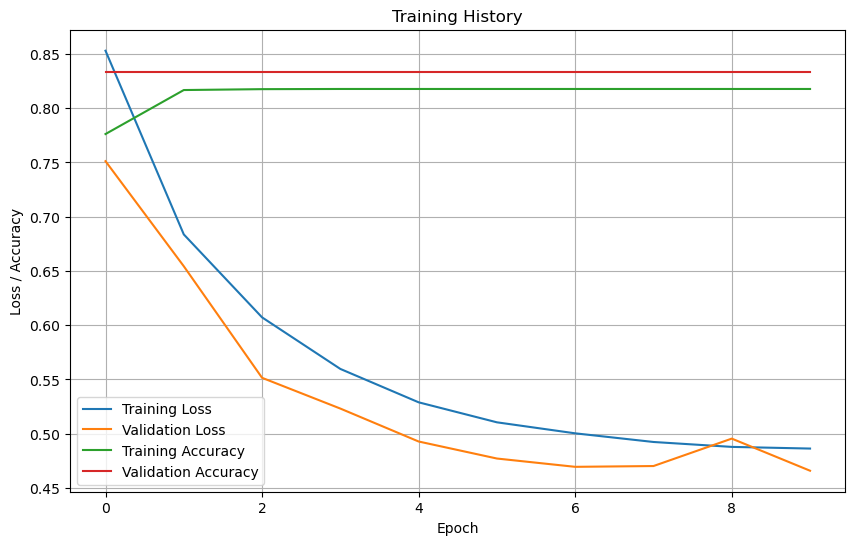

In [74]:
# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.plot(training_history.history['accuracy'], label='Training Accuracy')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss / Accuracy')
plt.title('Training History')
plt.legend()
plt.grid(True)
plt.show()


64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8378 - loss: 0.4601
Test Accuracy: 0.8331692814826965


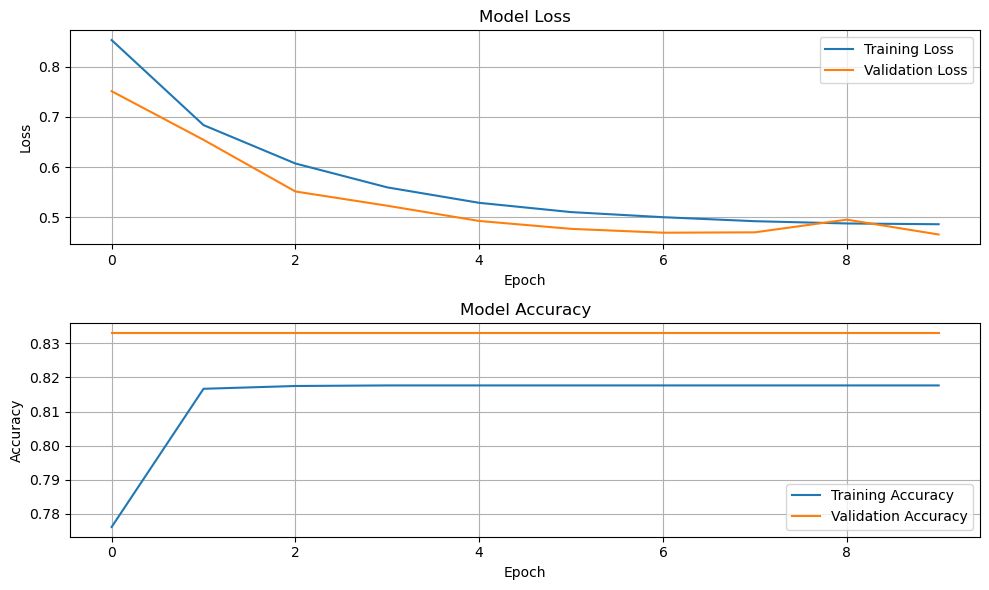

In [77]:
import matplotlib.pyplot as plt

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_padded, y_test)
print('Test Accuracy:', accuracy)

# Plot the training history
plt.figure(figsize=(10, 6))

# Plot training & validation loss values
plt.subplot(2, 1, 1)
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)

# Plot training & validation accuracy values
plt.subplot(2, 1, 2)
plt.plot(training_history.history['accuracy'], label='Training Accuracy')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


# Testing our model

In [78]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', accuracy)

64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.8378 - loss: 0.4601
Test Accuracy: 0.8331692814826965


# Model Training using differnt parameters

In [86]:
# Fit the model to the training data, using validation data for evaluation
training_history_2 = model.fit(
    X_train,  # Training data
    y_train,  # Training labels
    epochs=25,  # Number of epochs to train
    batch_size=32,  # Size of batches during training
    validation_data=(X_test, y_test),  # Validation data
    callbacks=[
        ModelCheckpoint('best_model_2.keras', monitor='val_loss', save_best_only=True)  # Save the best model based on validation loss
    ]
)

Epoch 1/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 32s 168ms/step - accuracy: 0.8141 - loss: 0.4820 - val_accuracy: 0.8332 - val_loss: 0.4564
Epoch 2/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 34s 178ms/step - accuracy: 0.8170 - loss: 0.4780 - val_accuracy: 0.8332 - val_loss: 0.4521
Epoch 3/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 36s 187ms/step - accuracy: 0.8216 - loss: 0.4726 - val_accuracy: 0.8332 - val_loss: 0.4543
Epoch 4/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 34s 179ms/step - accuracy: 0.8204 - loss: 0.4722 - val_accuracy: 0.8332 - val_loss: 0.4515
Epoch 5/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 37s 193ms/step - accuracy: 0.8123 - loss: 0.4857 - val_accuracy: 0.8332 - val_loss: 0.4528
Epoch 6/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 37s 195ms/step - accuracy: 0.8201 - loss: 0.4733 - val_accuracy: 0.8332 - val_loss: 0.4526
Epoch 7/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 36s 186ms/step - accuracy: 0.8130 - loss: 0.4836 - val_accuracy: 0.8332 - val_loss: 0.4523
Epoch 8/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 35s 181ms/step - accuracy: 0.8196 - loss: 0

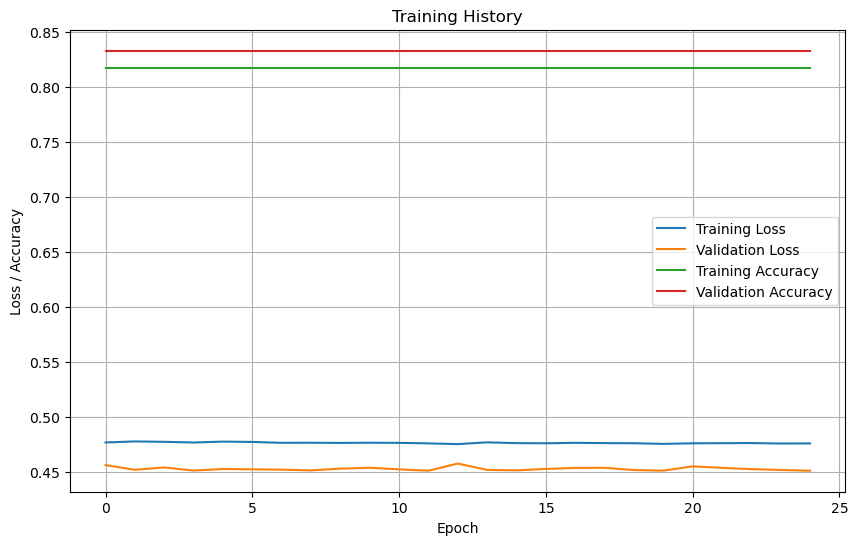

In [87]:
# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(training_history_2.history['loss'], label='Training Loss')
plt.plot(training_history_2.history['val_loss'], label='Validation Loss')
plt.plot(training_history_2.history['accuracy'], label='Training Accuracy')
plt.plot(training_history_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss / Accuracy')
plt.title('Training History')
plt.legend()
plt.grid(True)
plt.show()


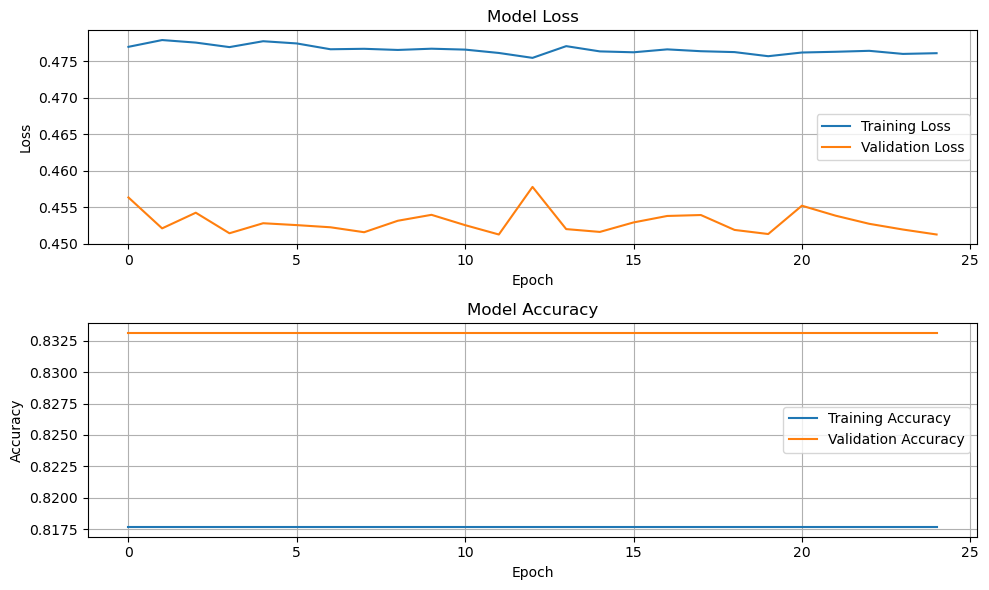

In [90]:
# Plot the training history
plt.figure(figsize=(10, 6))

# Plot training & validation loss values
plt.subplot(2, 1, 1)
plt.plot(training_history_2.history['loss'], label='Training Loss')
plt.plot(training_history_2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)

# Plot training & validation accuracy values
plt.subplot(2, 1, 2)
plt.plot(training_history_2.history['accuracy'], label='Training Accuracy')
plt.plot(training_history_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [89]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', accuracy)

64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.8378 - loss: 0.4441
Test Accuracy: 0.8331692814826965
